In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100000 # how many points in our timeseries?

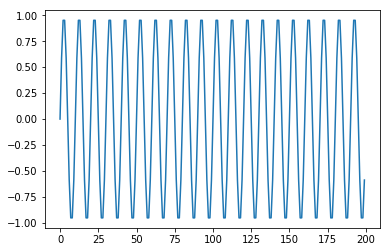

In [3]:
# create a signal that is nice and sinusoidal
arr = np.sin(10000 * np.linspace(0, 2*np.pi, T))# + np.sin(35000 * np.linspace(0, 2*np.pi, T))
plt.plot(arr[:200])

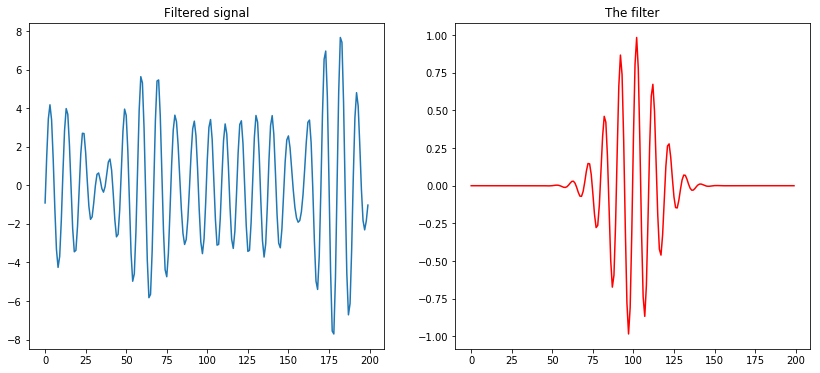

In [4]:
# create a signal that is sinusoidal, but not so nice
# by filtering noise using a band-pass filter
# (this is much more like real signals!)

kernel = np.exp(-np.linspace(-5, 5, 200)**2) 
kernel *= np.sin(20*np.linspace(0, 2*np.pi, 200))

arr2 = np.convolve(np.random.randn(T), kernel, 'same')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(arr2[:200])
plt.title("Filtered signal")

plt.subplot(1,2,2)
plt.plot(kernel, 'r-')
plt.title("The filter");

(0, 0.5)

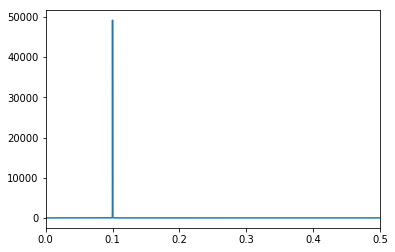

In [5]:
# take the fourier transform of the nice, sinusoidal signal

freqs = np.fft.fftshift(np.fft.fftfreq(T))
Farr = np.fft.fftshift(np.abs(np.fft.fft(arr)))
plt.plot(freqs, Farr)
plt.xlim(0, 0.5)

(0, 0.5)

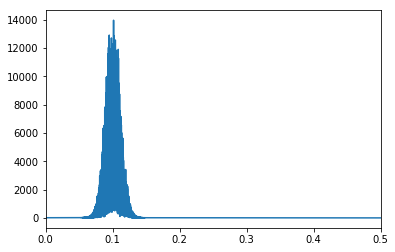

In [6]:
# take the fourier transform of the realistic signal

freqs = np.fft.fftshift(np.fft.fftfreq(T))
Farr = np.fft.fftshift(np.abs(np.fft.fft(arr2)))
plt.plot(freqs, Farr)
plt.xlim(0, 0.5)

(0, 0.5)

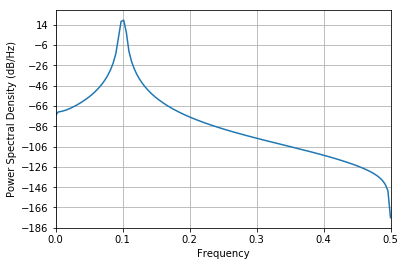

In [7]:
# now take the power spectrum of the nice, sinusoidal signal

Pxx, freq = plt.psd(arr, Fs=1.0)
plt.xlim(0, 0.5)

Text(0.5,0,'Frequency')

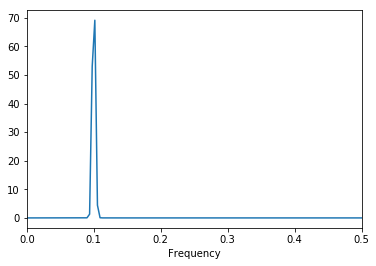

In [8]:
# (we can also plot the power spectrum in linear units, not decibels)
plt.plot(freq, Pxx)
plt.xlim(0, 0.5)
plt.xlabel("Frequency")

(0, 0.5)

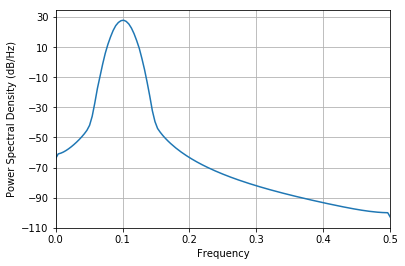

In [9]:
# and take the power spectrum of the realistic signal
# notice that the peak is wider, but it's not a noisy mess
# like the exact fourier transform

Pxx, freq = plt.psd(arr2, Fs=1.0)
plt.xlim(0, 0.5)

Text(0.5,0,'Frequency')

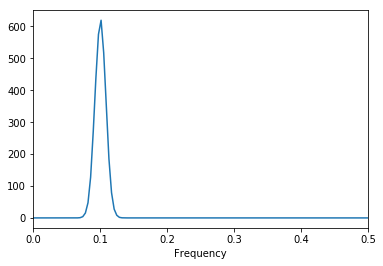

In [10]:
# (we can also plot the power spectrum in linear units, not decibels)
plt.plot(freq, Pxx)
plt.xlim(0, 0.5)
plt.xlabel("Frequency")

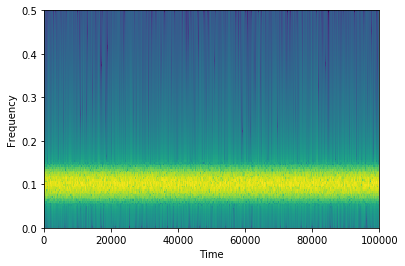

In [15]:
# and let's look at a spectrogram! (though this is quite boring)
plt.specgram(arr2, Fs=1.0)
plt.xlabel("Time")
plt.ylabel("Frequency");